# Case study on Unsupervised Learning

In [3]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [4]:
# importing data set in to python envirinment 
df= pd.read_csv("Wine.csv")

In [5]:
#first five rows of dataset
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [6]:
#Last five rows of dataset
df.tail()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
173        0.61                  0.52             1.06              7.7  0.64   
174        0.75                  0.43             1.41              7.3  0.70   
175        0.69                  0.43             1.35             10.2  0.59   
176        0.68                  0.53             1.46              9.3  0.60   
177        0.76                  0.56             1.35              9.2  0.61   

     OD280  Proline  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560

In [7]:
#shape of the dataset
df.shape

(178, 13)

In [8]:
#columns present in the dataset
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [9]:
#A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [10]:
# Check for null values
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [11]:
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

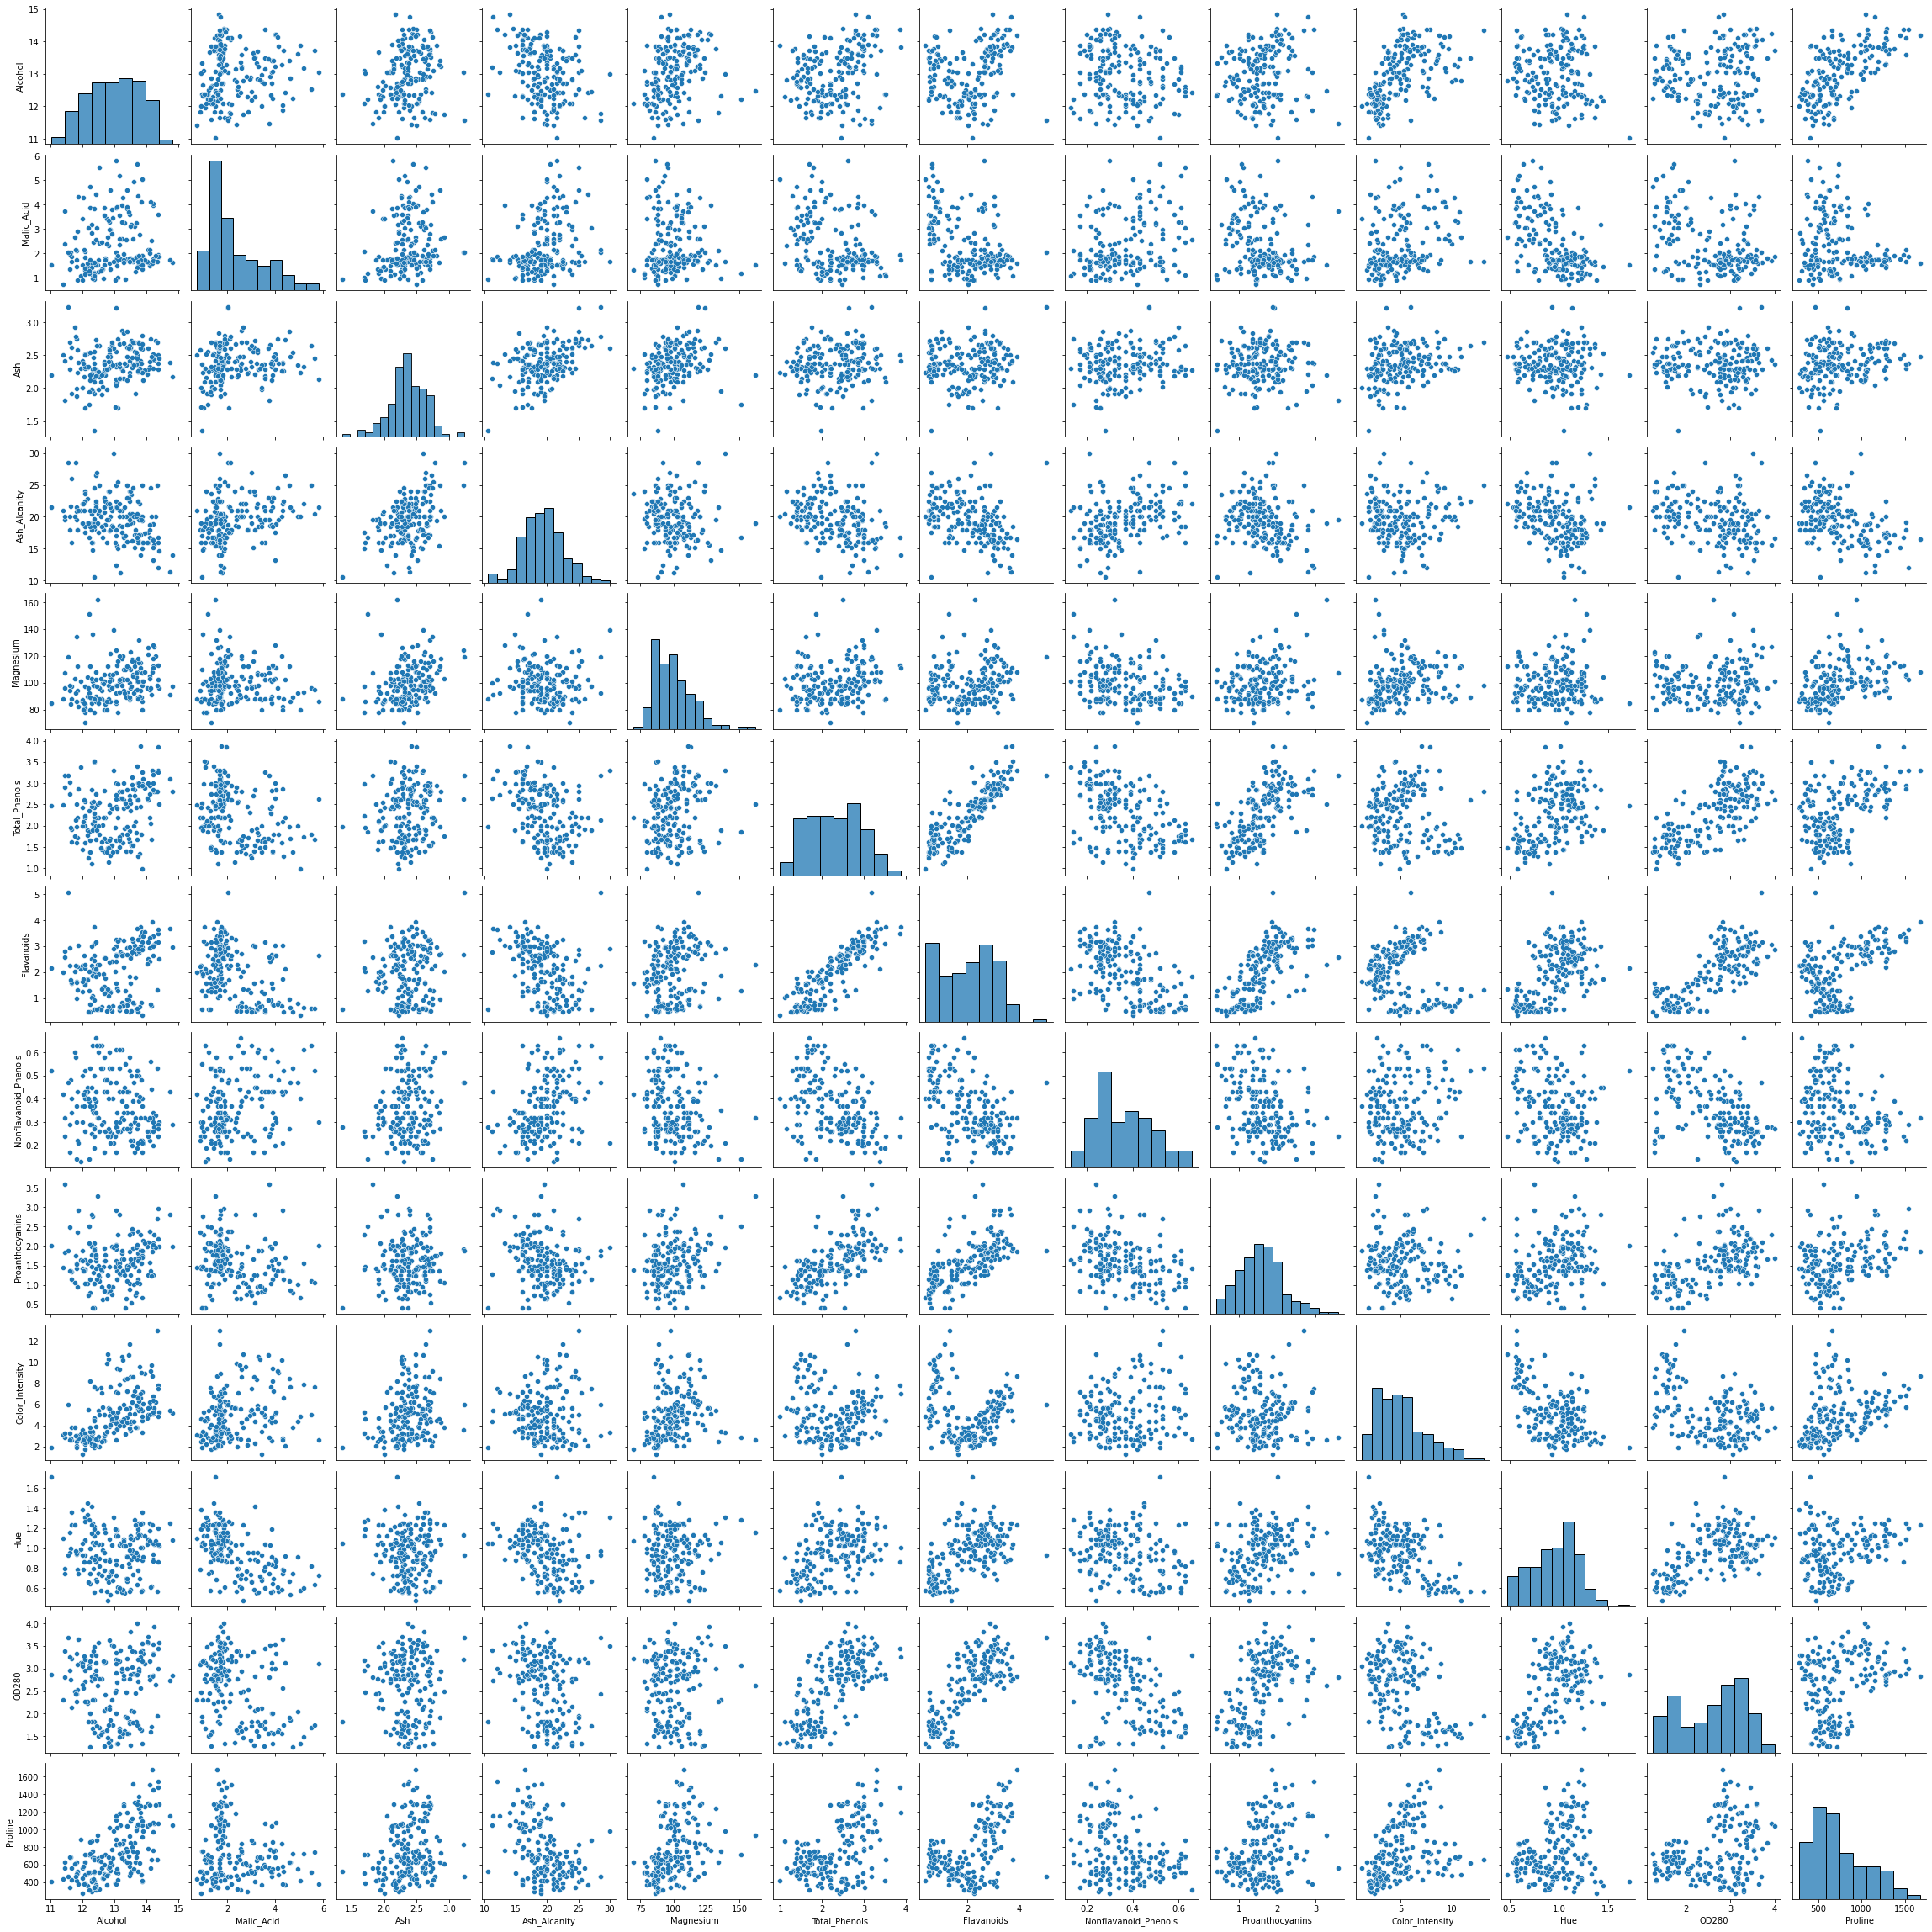

In [12]:
sns.pairplot(df)

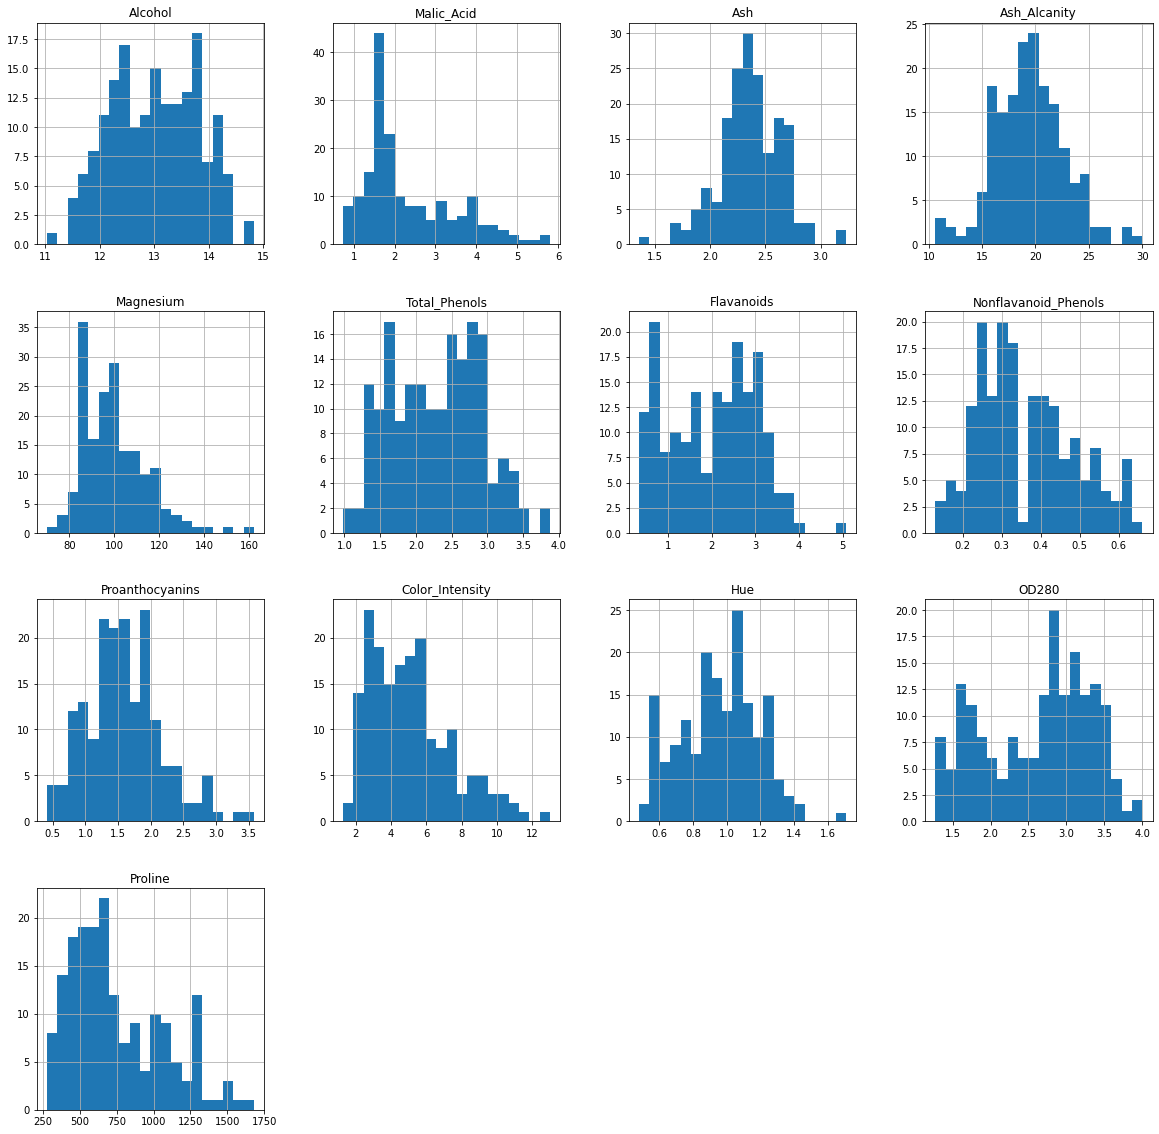

In [13]:
plt.rcParams["figure.figsize"] = (20, 20)
df.hist(bins=20)
plt.show()

### 1. KMeans clustering

17592296.383508474
4543749.614531863
2370689.6867829696
1337029.4929415903
916379.1871539167
647326.0020260852
412303.82825080125
323223.2470542671
270954.9292415374
217887.3785603329


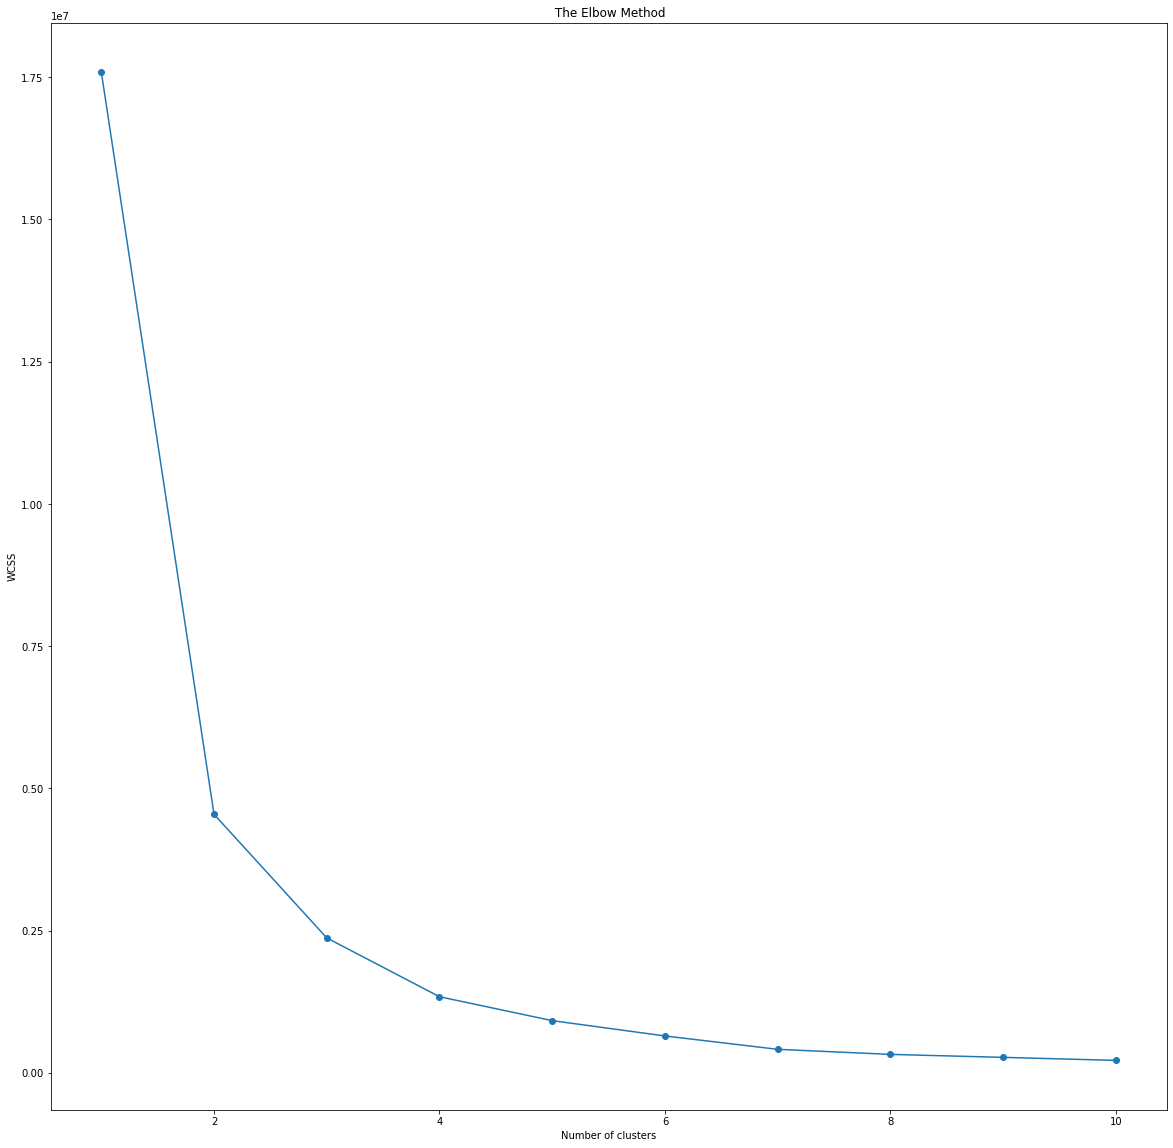

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++" , random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss,"-o")
plt.title(" The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


In [18]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(df)
#The silhouette_score gives the average value for all the   samples.
#Calculating number of clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,"    ,the average silhoutte_score is :", silhouette_avg)

For n_clusters = 2     ,the average silhoutte_score is : 0.6568536504294317
For n_clusters = 3     ,the average silhoutte_score is : 0.571138193786884
For n_clusters = 4     ,the average silhoutte_score is : 0.5572288268257268
For n_clusters = 5     ,the average silhoutte_score is : 0.5489993239795681
For n_clusters = 6     ,the average silhoutte_score is : 0.5656413100386375
For n_clusters = 7     ,the average silhoutte_score is : 0.5621677013863702
For n_clusters = 8     ,the average silhoutte_score is : 0.5398971441034123
For n_clusters = 9     ,the average silhoutte_score is : 0.5307235924738344
For n_clusters = 10     ,the average silhoutte_score is : 0.5203380520993408


In [19]:
# k-means
kmeans = KMeans(n_clusters = 2, init = "k-means++" , random_state=42)
y_kmeans =  kmeans.fit_predict(df)
type(df)
y_kmeans

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [21]:
#Evaluating the model
silhouette_avg = silhouette_score(df,y_kmeans)
print(silhouette_avg)

0.6568536504294317


In [23]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df)
scaled_data = pd.DataFrame(scaled_data, columns = df.columns)
scaled_data.describe()

Alcohol    Malic_Acid           Ash  Ash_Alcanity     Magnesium  \
count  1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02   
mean  -8.619821e-16 -8.357859e-17 -8.657245e-16 -1.160121e-16 -1.995907e-17   
std    1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00   
min   -2.434235e+00 -1.432983e+00 -3.679162e+00 -2.671018e+00 -2.088255e+00   
25%   -7.882448e-01 -6.587486e-01 -5.721225e-01 -6.891372e-01 -8.244151e-01   
50%    6.099988e-02 -4.231120e-01 -2.382132e-02  1.518295e-03 -1.222817e-01   
75%    8.361286e-01  6.697929e-01  6.981085e-01  6.020883e-01  5.096384e-01   
max    2.259772e+00  3.109192e+00  3.156325e+00  3.154511e+00  4.371372e+00   

       Total_Phenols    Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count   1.780000e+02  1.780000e+02          1.780000e+02     1.780000e+02   
mean   -2.972030e-16 -4.016762e-16          4.079134e-16    -1.699639e-16   
std     1.002821e+00  1.002821e+00          1.002821e+00     1.002821e+00   
min    -2.107246e+00 -1.695971e+00         -1.868234e+00    -2.069034e+00   
25%    -8.854682e-01 -8.275393e-01         -7.401412e-01    -5.972835e-01   
50%     9.595986e-02  1.061497e-01         -1.760948e-01    -6.289785e-02   
75%     8.089974e-01  8.490851e-01          6.095413e-01     6.291754e-01   
max     2.539515e+00  3.062832e+00          2.402403e+00     3.485073e+00   

       Color_Intensity           Hue         OD280       Proline  
count     1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02  
mean     -1.122697e-17  3.717376e-16  2.919013e-16 -7.484650e-18  
std       1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00  
min      -1.634288e+00 -2.094732e+00 -1.895054e+00 -1.493188e+00  
25%      -7.951025e-01 -7.675624e-01 -9.522483e-01 -7.846378e-01  
50%      -1.592246e-01  3.312687e-02  2.377348e-01 -2.337204e-01  
75%       4.939560e-01  7.131644e-01  7.885875e-01  7.582494e-01  
max       3.435432e+00  3.301694e+00  1.960915e+00  2.971473e+00

In [25]:
# PCA analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(178, 2)

1282.1026695794822
628.7883507554777
259.50938075119353
192.39061530234858
155.06920474891723
123.01349501833545
99.2481454838704
90.33629680728127
81.72385276099882
72.66776068221814


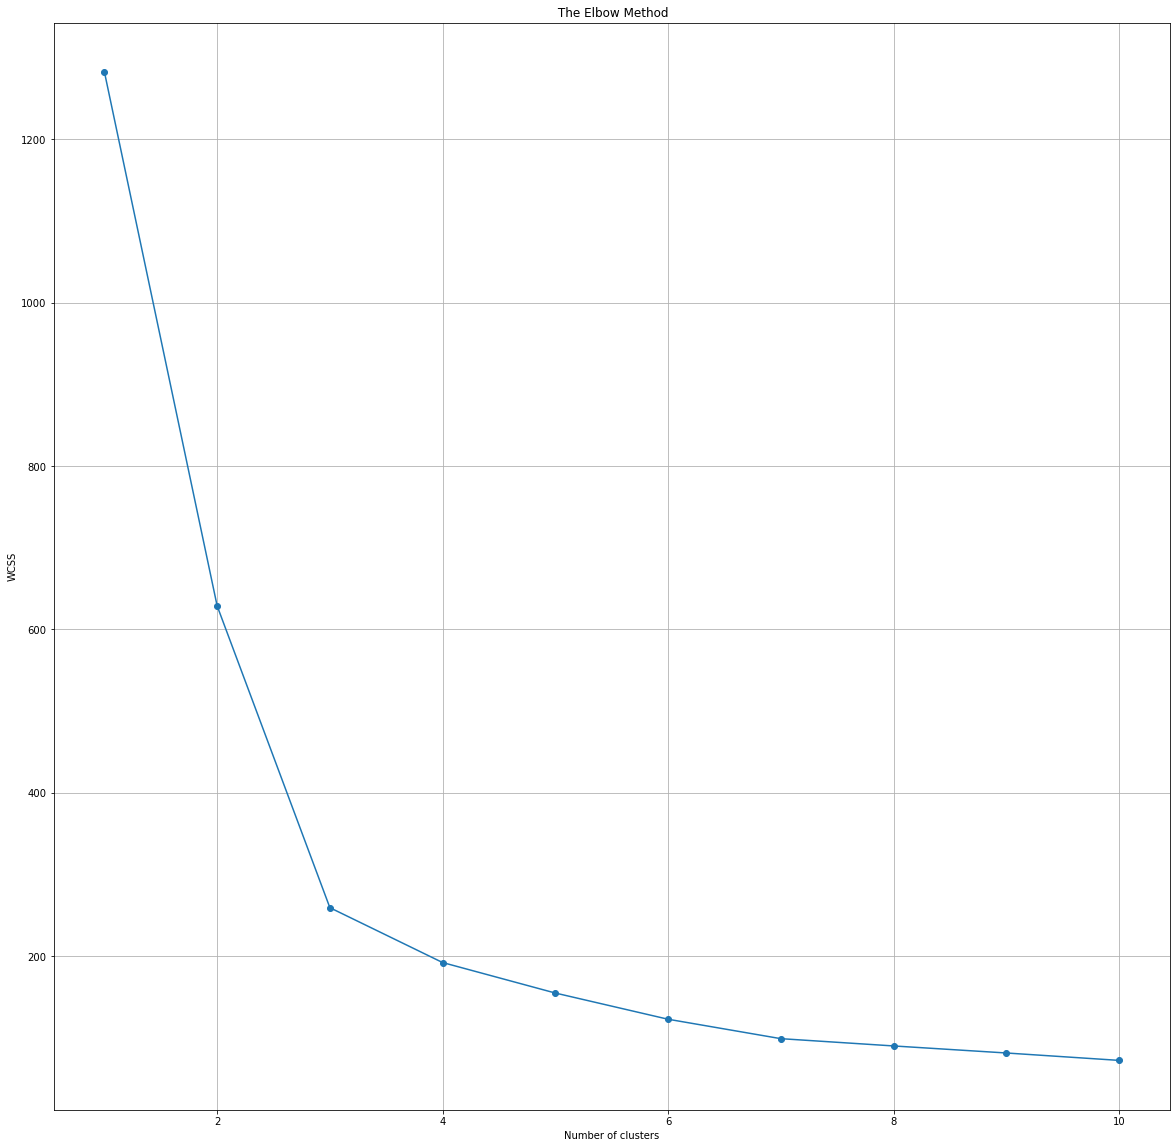

In [26]:
#Carrying out k means clustering after PCA
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++" , random_state=42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss,"-o")
plt.title(" The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [27]:
#Finding no. of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    #Initializing the clusterer with n_clusters value and a random   generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(x_pca)
    #The silhouette_score gives the average value for all the   samples.
    #Calculating number of clusters
    silhouette_avg = silhouette_score(x_pca, cluster_labels)
    print("For n_clusters =", n_clusters,"     The average silhoutte_score is :", silhouette_avg)

For n_clusters = 2      The average silhoutte_score is : 0.46491409089201524
For n_clusters = 3      The average silhoutte_score is : 0.5610505693103246
For n_clusters = 4      The average silhoutte_score is : 0.4914213395710316
For n_clusters = 5      The average silhoutte_score is : 0.4411644097008514
For n_clusters = 6      The average silhoutte_score is : 0.4309078483871919
For n_clusters = 7      The average silhoutte_score is : 0.42357060607218666
For n_clusters = 8      The average silhoutte_score is : 0.3886570286272501
For n_clusters = 9      The average silhoutte_score is : 0.38931499239114614
For n_clusters = 10      The average silhoutte_score is : 0.4086934229714141


Here we can find that the silhouette score is greater for 3 clusters.So we choose 3 clusters

In [28]:
# k-means
kmeans = KMeans(n_clusters = 3, init = "k-means++" , random_state=42)
y_kmeans1 =  kmeans.fit_predict(x_pca)
type(x_pca)
y_kmeans1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [29]:
#Evaluating the model after pca analysis
silhouette_avg = silhouette_score(x_pca,y_kmeans1)
print(silhouette_avg)

0.5610505693103246


* It is found that after the PCA analysis the average sihouette score has been reduced to 0.561. Before the analysis the score was 0.656.So carrying out PCA for this model is not advised.

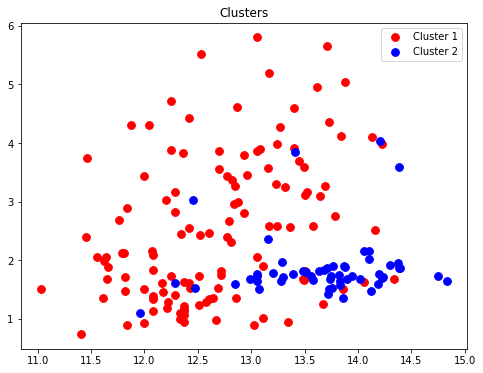

In [32]:
#Kmeans cluster plotting
X=df.values
plt.figure(figsize=(8,6))
plt.scatter(X[y_kmeans== 0,0],X[y_kmeans== 0,1],s=60, c="red",label="Cluster 1")
plt.scatter(X[y_kmeans== 1,0],X[y_kmeans== 1,1],s=60, c="blue",label="Cluster 2")
plt.title("Clusters")
plt.legend()
plt.show()

### 2.Agglomerative Hierarchical clustering

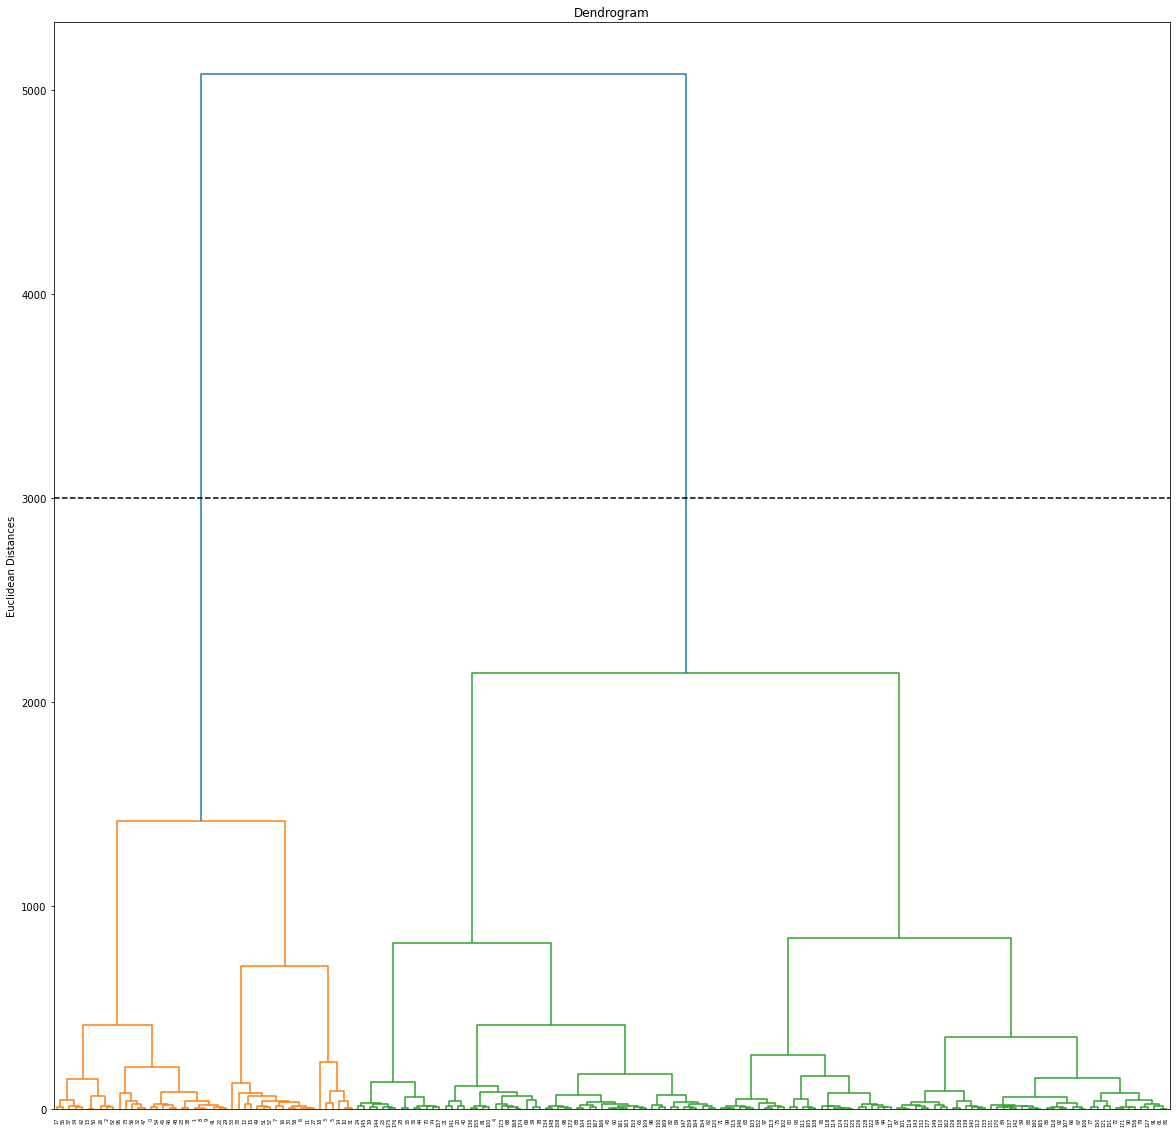

In [34]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = "ward"))
plt.hlines(3000,0,5000,colors="black",linestyle="dashed")
plt.title("Dendrogram")
plt.ylabel("Euclidean Distances")
plt.show()

In [36]:
#Fitting Agglomerative clustering model
from sklearn.cluster import AgglomerativeClustering
hc =  AgglomerativeClustering(n_clusters = 2, affinity ="euclidean", linkage = "ward")
y_hc = hc.fit_predict(df)

In [37]:
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [39]:
#Evaluvate model
silhouette_avg = silhouette_score(df,y_hc)
print(silhouette_avg)

0.6587292996216912


Trying to improve the efficiency using PCA

In [41]:
#normalizing data
from sklearn.preprocessing import Normalizer
norm = Normalizer()
n_df = norm.fit_transform(df)

In [42]:
# doing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(n_df)
x_pca1 = pca.transform(n_df)
x_pca1.shape

(178, 2)

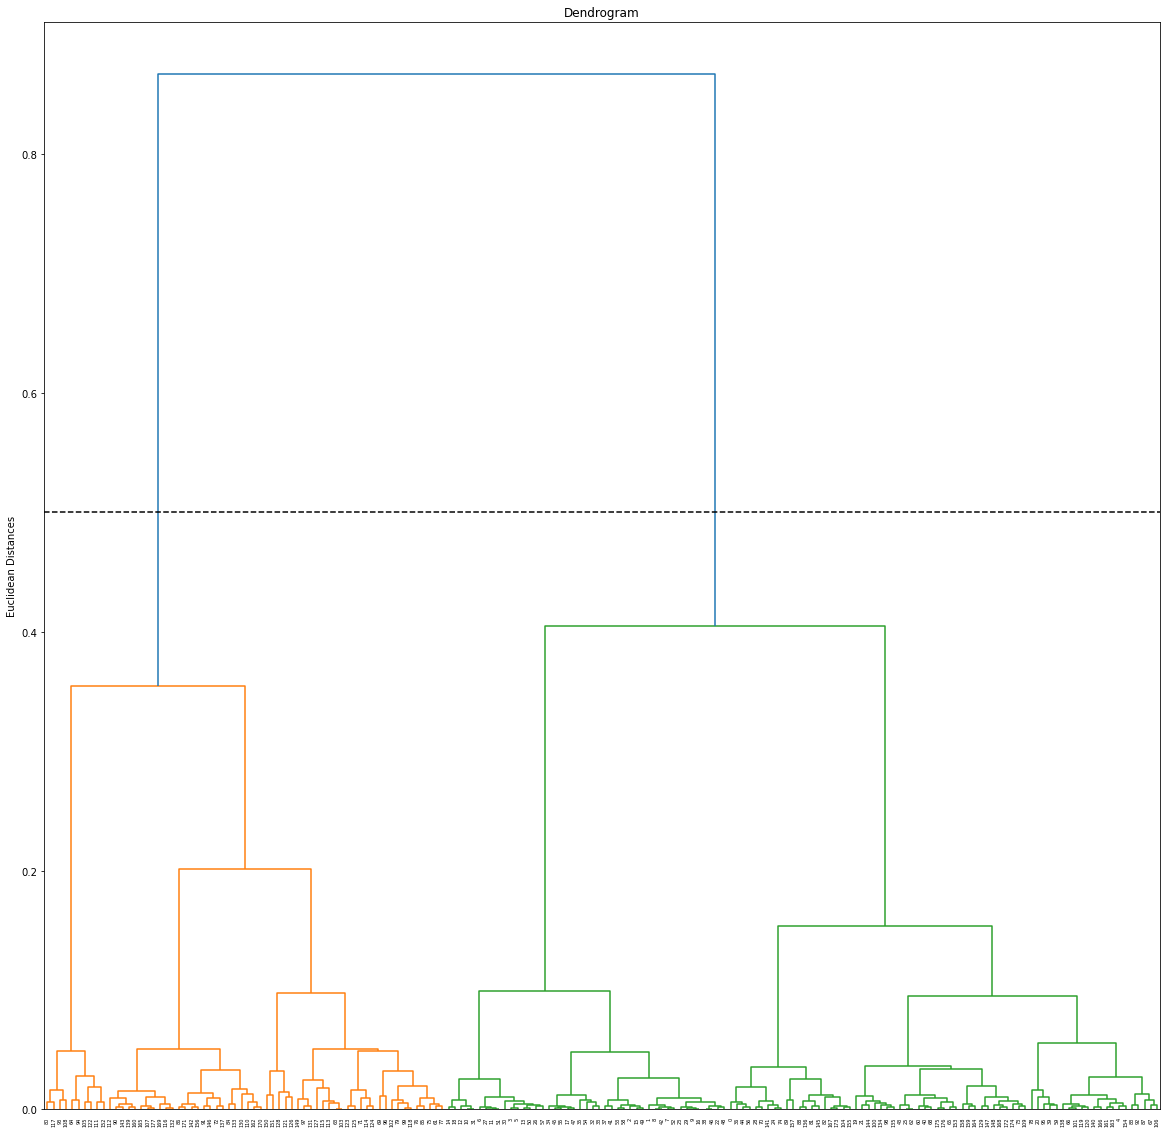

In [44]:
#Carrying out Agglomerative clustering after PCA
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x_pca1, method = "ward"))
plt.hlines(0.5,0,5000,colors="black",linestyle="dashed")
plt.title("Dendrogram")
plt.ylabel("Euclidean Distances")
plt.show()

In [45]:
from sklearn.cluster import AgglomerativeClustering
hc =  AgglomerativeClustering(n_clusters = 2, affinity ="euclidean", linkage = "ward")
y_hc1 = hc.fit_predict(x_pca1)

In [46]:
y_hc1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [47]:
#Evaluating the model
silhouette_avg = silhouette_score(x_pca1,y_hc1)
print(silhouette_avg)

0.5461320282173209


* It is found that after finding carrying out the PCA analysis the silhouette score is 0.546. Before the analysis the score was 0.658 which is greater. So for this model too carrying out of PCA is not advised.

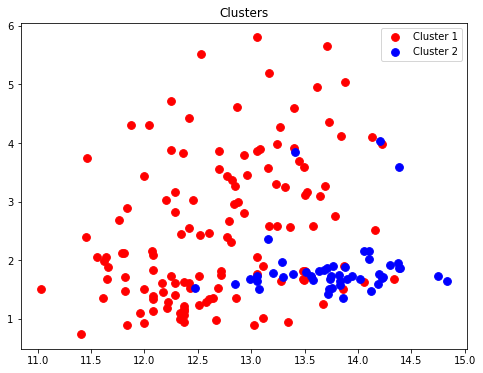

In [48]:
#Agglomerative cluster plotting
plt.figure(figsize=(8,6))
plt.scatter(X[y_hc== 0,0],X[y_hc== 0,1],s=60, c="red",label="Cluster 1")
plt.scatter(X[y_hc== 1,0],X[y_hc== 1,1],s=60, c="blue",label="Cluster 2")
plt.title("Clusters")
plt.legend()
plt.show()

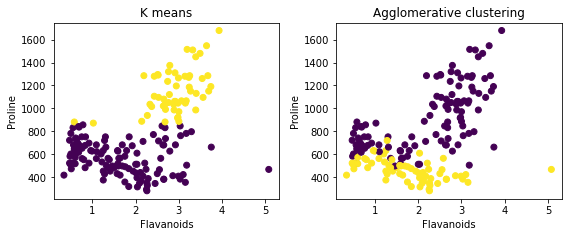

In [50]:
#Plotting the graphs of two model with an example
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
A=df["Flavanoids"]
B=df["Proline"]
plt.scatter(A,B,c=y_kmeans)
plt.title("K means")
plt.xlabel("Flavanoids")
plt.ylabel("Proline")

plt.subplot(2,2,2)
A=df["Flavanoids"]
B=df["Proline"]
plt.scatter(A,B,c=y_hc1)
plt.title("Agglomerative clustering")
plt.xlabel("Flavanoids")
plt.ylabel("Proline")

plt.tight_layout()

Findings:

* From the above examples of two graphs showing high overlapping.The extent of overlap is comparatively more for agglomerative clustering. Both the models show 2 clusters.

For Kmeans-Clusters with low to average flavanoids with less proline below 1000 becomes a cluster majority.Proline content is low for the majority cluster.
For Agglomerative-Proline is graphed from 400 upto 1600 with flavanoids from low to average forms a cluster majority here.A high proline content majority cluster is formed here.
